# Visualizing Vehicle and Traffic Accidents in London

This notebook analysis traffic accidents within London. The data consists of over 1.6 million data points from 2005-2014, and it is available [here](https://www.dft.gov.uk/traffic-counts/download.php). This quick analysis will answer two of the following questions:

- Did the number of accidents decrease over time?
- What is the worst month for traffic accidents? 

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import folium
sns.set_style('darkgrid')
plt.style.use('seaborn-poster')
%matplotlib inline

## Loading and Cleaning Data

I will load a small set of data and filter it down to be London specific since it is much easier to clean. I will get rid of unnecessary data points along the way. Once that is out of the way, I will join the remaining data. 

In [2]:
df1 = pd.read_csv("data/accidents_2005_to_2007.csv")
df1.head()

/home/thomas/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002849,2005
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002909,2005
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002857,2005
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002840,2005
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002863,2005


In [3]:
df1.shape

(570011, 33)

In [4]:
df1.describe()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,Junction_Detail,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
count,569910.000000,5.699100e+05,569910.000000,569910.000000,570011.000000,570011.000000,570011.000000,570011.000000,570011.000000,570011.000000,570011.000000,570011.000000,570011.000000,0.0,570011.000000,570011.000000,570011.000000,570011.000000
mean,435609.680423,3.017252e+05,-1.494988,52.603655,31.205219,2.839647,1.840773,1.363484,4.124371,358.870490,4.107094,1001.977992,39.788329,NaN,2.588634,379.357298,1.367330,2005.970843
std,95639.717128,1.613470e+05,1.406187,1.452752,25.516761,0.405771,0.722930,0.823950,1.932537,258.233842,1.446774,1832.143128,14.474087,NaN,3.221140,1306.844752,0.482558,0.816882
min,64980.000000,1.052000e+04,-7.515933,49.914513,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,10.000000,NaN,-1.000000,-1.000000,1.000000,2005.000000
25%,371020.000000,1.787400e+05,-2.434639,51.494892,7.000000,3.000000,1.000000,1.000000,2.000000,126.000000,3.000000,0.000000,30.000000,NaN,-1.000000,0.000000,1.000000,2005.000000
50%,435490.000000,2.773850e+05,-1.470388,52.388312,31.000000,3.000000,2.000000,1.000000,4.000000,340.000000,4.000000,112.000000,30.000000,NaN,3.000000,0.000000,1.000000,2006.000000
75%,519230.000000,3.982800e+05,-0.267764,53.480015,46.000000,3.000000,2.000000,1.000000,6.000000,536.000000,6.000000,694.000000,60.000000,NaN,6.000000,0.000000,2.000000,2007.000000
max,655290.000000,1.208800e+06,1.758337,60.757544,98.000000,3.000000,28.000000,68.000000,7.000000,941.000000,6.000000,9999.000000,70.000000,NaN,6.000000,9999.000000,3.000000,2007.000000


Nothing seems out of the ordinary. The dataframe consists of over half a million rows containing geographic coordinates, traffic accidents and casualties, number of vehicles and so on.

### Finding Coordinates Within Range of One Coordinate

The [Haversine formula](https://en.wikipedia.org/wiki/Haversine_formula) is used to calculate the great-circle distance between two points. In terms of math, it is defined as

a = sin²(Δφ/2) + cos φ1 ⋅ cos φ2 ⋅ sin²(Δλ/2)

c = 2 ⋅ atan2( √a, √(1−a) )

d = R ⋅ c

where φ is latitude, λ is longitude, R is earth’s radius. 

In [5]:
from math import radians, sin, cos, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    #convert decimal degrees to radians
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    #formula
    coord1 = lon2 - lon1
    coord2 = lat2 - lat1
    a = sin(coord2/2)**2 + cos(lat1) * cos(lat2) * sin(coord1/2)**2
    c = 2*asin(sqrt(a))
    r = 6371 #radius in kilometers
    return c*r

Let's test out the haversine function. I decided the London City Airport will do as the city center and any point inside the 60km area is considered London.

In [6]:
london = {'latitude': 51.504873, 'longitude': 0.049368}
kingston = {'latitude': 51.412562, 'longitude': -0.300701}
distance = 60

In [7]:
print(haversine(london['longitude'], london['latitude'],
               kingston['longitude'], kingston['latitude']))

26.336463236211763


Kingston to the London City airport is 30 km away according to Google Maps. It is somewhat imprecise, but it will serve our purposes. 

In order to figure out which coordinates are within London, I will wrap the haversine function with another function.

In [8]:
def in_london(lon, lat, center=None, distance=60):
    """
    Determines if a particular spot is within London
    
    Args:
        lon (float): longitude
        lat (float): latitude
        center: center of latitude and longitude
        distance: coordinates from center in km
        
    Returns: 
        boolean value
    """
    if not center:
        center = london
    return haversine(center['longitude'], center['latitude'], lon, lat) <= distance

In [9]:
#keep relevant columns
cols_to_keep = ['Year', 'Time', 'Day_of_Week', 'Number_of_Vehicles', 'Date',
               'Number_of_Casualties', 'Accident_Severity', 'Longitude', 'Latitude']
df1 = df1[cols_to_keep]

#add two additional columns for our analysis
df1['in_london'] = df1.apply(lambda x: in_london(x['Longitude'], x['Latitude']), axis=1)
df1['haversine_distance_km'] = df1.apply(lambda x: 
                                      haversine(london['longitude'], london['latitude'], 
                                                x['Longitude'], x['Latitude']), axis=1)

In [10]:
#filter dataframe within the London area
df1 = df1[df1['in_london'] == True]
df1.shape

(133256, 11)

### Working With Dates

The time element is crucial to this analysis. This dataset is too large to look at each accident on a day-to-day basis so that we will analyze it by month.

In [11]:
#convert Date column into datetime format
df1['Date'] = pd.to_datetime(df1['Date'], errors='coerce')
#extract month and year
df1['YearMonth'] = df1['Date'].map(lambda x: 100*x.year + x.month).astype(str)

### Measuring Traffic Accidents

Now that we have the Year-Month column, we can group the columns we need around these months. Then we can visualize the trend of traffic accidents.

In [12]:
df1_table = df1.groupby(['YearMonth'])['Number_of_Casualties', 
                                       'Number_of_Vehicles'].sum().reset_index()

In [65]:
df1_table.head(20)

,YearMonth,Number_of_Casualties,Number_of_Vehicles
0,200501,5188,7587
1,200502,4303,6236
2,200503,4723,6813
3,200504,4850,7050
4,200505,5061,7454
5,200506,5137,7530
6,200507,5053,7484
7,200508,5089,7394
8,200509,5171,7651
9,200510,5227,7619


/home/thomas/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


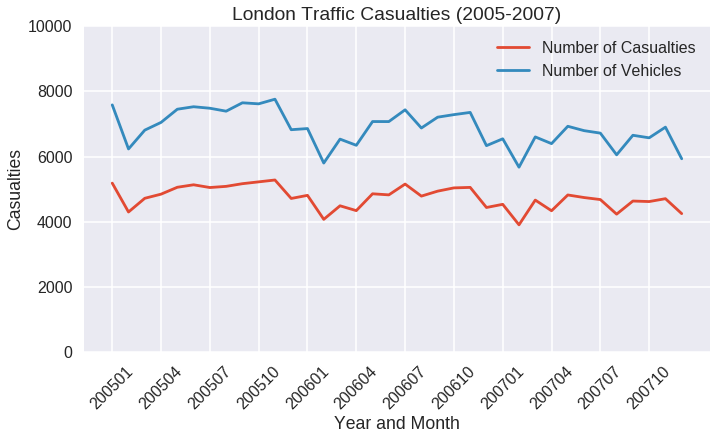

In [66]:
#visualize results
ax = df1_table.plot(figsize=(10,6),
                    y=['Number_of_Casualties', 'Number_of_Vehicles'],
                    xticks=df1_table.index[0::3], rot=45)
ax.set_xticklabels(df1_table['YearMonth'][0::3])
ax.legend(["Number of Casualties", "Number of Vehicles"])
plt.ylim([0,10000])
plt.ylabel('Casualties')
plt.xlabel('Year and Month')
plt.title('London Traffic Casualties (2005-2007)')

It seems the number of accidents drops slightly between the years 2005 and 2007 with the most significant decrease between October 2005 and January 2006. Maybe we will find a pattern when we add more data.

In [15]:
#dataframe 2
df2 = pd.read_csv('data/accidents_2009_to_2011.csv')
df2 = df2[cols_to_keep]
df2['in_london'] = df2.apply(lambda x: in_london(x['Longitude'], x['Latitude']), axis=1)
df2['haversine_distance_km'] = df2.apply(lambda x: 
                                      haversine(london['longitude'], london['latitude'], 
                                                x['Longitude'], x['Latitude']), axis=1)
df2 = df2[df2['in_london'] == True]
df2['Date'] = pd.to_datetime(df2['Date'], errors='coerce')
df2['YearMonth'] = df2['Date'].map(lambda x: 100*x.year + x.month).astype(str)
df2_table = df2.groupby(['YearMonth'])['Number_of_Casualties', 
                                       'Number_of_Vehicles'].sum().reset_index()

In [16]:
#dataframe 3
df3 = pd.read_csv('data/accidents_2012_to_2014.csv')
df3 = df3[cols_to_keep]
df3['in_london'] = df3.apply(lambda x: in_london(x['Longitude'], x['Latitude']), axis=1)
df3['haversine_distance_km'] = df3.apply(lambda x: 
                                      haversine(london['longitude'], london['latitude'], 
                                                x['Longitude'], x['Latitude']), axis=1)
df3 = df3[df3['in_london'] == True]
df3['Date'] = pd.to_datetime(df3['Date'], errors='coerce')
df3['YearMonth'] = df3['Date'].map(lambda x: 100*x.year + x.month).astype(str)
df3_table = df3.groupby(['YearMonth'])['Number_of_Casualties', 
                                       'Number_of_Vehicles'].sum().reset_index()

/home/thomas/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [17]:
#combine frames
frames = [df1_table, df2_table, df3_table]
df_table = pd.concat(frames)
df_table = df_table.sort_values('YearMonth').reset_index()

/home/thomas/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


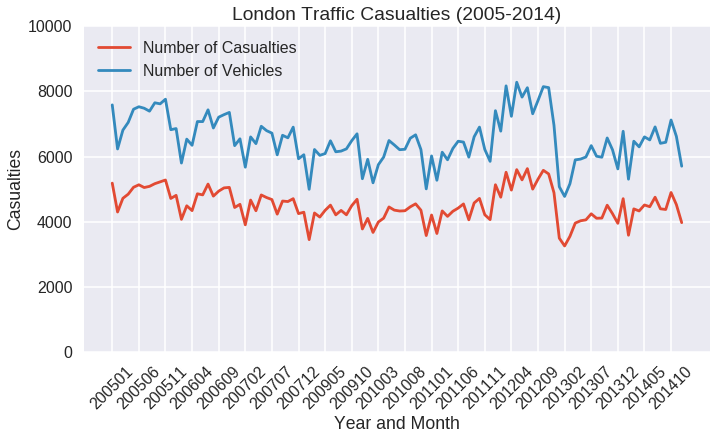

In [68]:
#visualize
ax = df_table.plot(figsize=(10,6), 
                   y=['Number_of_Casualties', 'Number_of_Vehicles'],
                   xticks=df_table.index[0::5], rot=45)
ax.set_xticklabels(df_table['YearMonth'][0::5])
ax.legend(["Number of Casualties", "Number of Vehicles"])
plt.ylim([0,10000])
plt.ylabel('Casualties')
plt.xlabel('Year and Month')
plt.title('London Traffic Casualties (2005-2014)')
plt.savefig('accidents-occurred')

With more data, we are starting to see a pattern here. The number of accidents decreases over time with the most significant drop occurring between late 2012 and early 2013. Afterward, the trend moves upwards until it falls in late 2014.

### Mapping Worst Month of Accidents


The graph shows us that the worst stretch of accidents occurred in 2012 between April and September. 

In [52]:
df_table.loc[df_table['Number_of_Vehicles'].idxmax()]

index                        4
YearMonth               201205
Number_of_Casualties      5602
Number_of_Vehicles        8281
Name: 76, dtype: object

May 2012 is the worst month for accidents with more than 8000 vehicles and 5000 casualties reported.

In [63]:
#select only the worst month
df_map = df3[df3['YearMonth'] == '201205']

m = folium.Map(location=[london['latitude'], london['longitude']], tiles='stamentoner')
#plot points on map
for idx, row in df_map.iterrows():
    folium.CircleMarker([row.loc['Latitude'], row.loc['Longitude']], 
                        radius=row['Number_of_Casualties'], 
                        fill=True, color="#d30a0a", opacity=0.4
                       ).add_to(m)
m

## Conclusion
Throughout the analysis, we noted that traffic accidents declined overall; however, the majority of traffic accidents occurred in the city center. Car collisions appear less frequent further outside the center. There is more we could do with this data set to answer more questions such as:
- Which type of weather had more collisions?
- Are accidents more likely to happen at higher speeds?
- Does time factor into the number of accidents?